carbon_monoxide --> co_conc
sulphur_dioxide --> so2_conc
nitrogen_dioxide --> no2_conc   
ozone --> o3_conc
particulate_matter_2.5um --> pm2p5_conc
pm10_wildfires  -->  pmwf_conc  

nitrogen_monoxide --> no_conc

In [2]:
from myFunctions import getSum, getSum2, DIYColorMap
from matplotlib import colors
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
ds_name = 'cams-europe-air-quality-forecasts'  # dataset name
ds_time = '2022-01-01/2022-01-01'  
# ds_time = '2021-01-01/2021-12-31'  # year sum

# dataset variable; should let users input this variable
ds_variable = 'ozone'


[mean_data, latitude, longitude, rdata]= getSum.getSum_mean(ds_name=ds_name, ds_time=ds_time, ds_variable=ds_variable)
#[foo, rdata] = getSum2.getSum_day(ds_name=ds_name, ds_time=ds_time, ds_variable=ds_variable)

2022-06-04 21:53:09,235 INFO Welcome to the CDS
2022-06-04 21:53:09,235 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2022-06-04 21:53:09,278 INFO Request is queued
2022-06-04 21:53:10,319 INFO Request is running
2022-06-04 21:53:11,853 INFO Request is completed
2022-06-04 21:53:11,853 INFO Downloading https://download-0003-ads-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.cams_regional_fc.retrieve-1654372388.4845655-3210-13-55d8b11a-dbfc-4ea0-ba14-207af497be05.nc to download.nc (26.9M)
2022-06-04 21:53:19,595 INFO Download rate 3.5M/s   


In [3]:
# rdata.o3_conc.values

In [4]:
print(mean_data)

[[72.68624  73.41692  74.1404   ... 68.21549  68.19914  68.15911 ]
 [74.01086  74.64284  75.64714  ... 68.02526  68.04197  68.02383 ]
 [75.245544 76.004326 76.58191  ... 67.65346  67.7001   67.54788 ]
 ...
 [74.3401   73.948296 73.57196  ... 74.36919  73.829185 72.19562 ]
 [73.95799  73.535484 73.11974  ... 73.750885 73.57691  71.72027 ]
 [73.90038  73.2989   73.037384 ... 71.32827  71.616425 71.09807 ]]


The daily threshold of ozone is 70 μg/m3


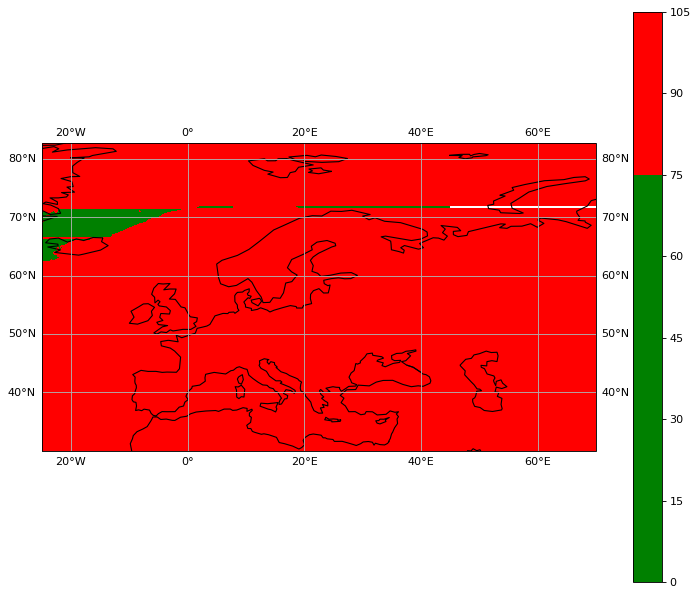

In [15]:
# The comments below is just a simplified custom colormap without importing from another .py file. Just use to test. 

# # Modified from https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-for-imshow-in-matplotlib
# # Define a custom colormap. 
# cmap = colors.ListedColormap(['green', 'red'])
# bounds=[0,70,100]
# norm = colors.BoundaryNorm(bounds, cmap.N)

# Should let users to input GoodColor, BadColor, d_timescale these three formal parameters. Check DIYColorMap.py for more information. 
GoodColor = 'green'
BadColor = 'red'
d_timescale = 'Daily'

cmap = DIYColorMap.ColorMap_Color(GoodColor=GoodColor,BadColor=BadColor)
bounds = DIYColorMap.ColorMap_Threshold(ds_variable=ds_variable,d_timescale=d_timescale)
norm = DIYColorMap.ColorMap_Norm(d_bounds=bounds,d_cmap=cmap)
threshold = bounds[1]

print("The daily threshold of " + ds_variable + " is " + str(threshold) + " μg/m3")

plt.figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())

img = plt.contourf(longitude, latitude, mean_data, cmap=cmap, norm=norm,
             transform=ccrs.PlateCarree())

# # Colorbar

# plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, threshold, 100])

# plt.colorbar(img,fraction=0.046, pad=0.06)

# Legends



ax.set_extent([70,-25,30,80])
ax.coastlines()
ax.gridlines(draw_labels=True)

plt.show()